In [1]:
#Importing dependencies 
import pandas as pd
import os 
import pprint

In [2]:
#Importing csv from Resources 
path = 'Resources/VISTA_cleaned.csv'
Vista = pd.read_csv(path)

In [3]:
Vista.head()

,Trip_ID,Person_ID,Year,Total_Stops,Trip_Count,Start_Time,Arrival_Time,Trip_Time,Travel_Time,Wait_Time,...,Mode_5,Mode_6,Mode_7,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7
0,Y12H0000102P03T01,Y12H0000102P03,2012,3,1,510,580,70,54,16,...,0,0,0,10,34.0,10.0,0.0,0.0,0.0,0.0
1,Y12H0000102P03T02,Y12H0000102P03,2012,3,2,1050,1120,70,56,14,...,0,0,0,10,36.0,10.0,0.0,0.0,0.0,0.0
2,Y12H0000103P03T02,Y12H0000103P03,2012,3,2,920,950,30,28,2,...,0,0,0,5,8.0,15.0,0.0,0.0,0.0,0.0
3,Y12H0000103P04T02,Y12H0000103P04,2012,3,2,920,950,30,28,2,...,0,0,0,5,8.0,15.0,0.0,0.0,0.0,0.0
4,Y12H0000303P01T01,Y12H0000303P01,2012,3,1,430,460,30,30,0,...,0,0,0,10,15.0,5.0,0.0,0.0,0.0,0.0


In [4]:
#Checking rows counts
print(f"There are {len(Vista)} rows in the dataset")

There are 8758 rows in the dataset


In [5]:
#Checking columns in dataset
Vista.columns

Index(['Trip_ID', 'Person_ID', 'Year', 'Total_Stops', 'Trip_Count',
       'Start_Time', 'Arrival_Time', 'Trip_Time', 'Travel_Time', 'Wait_Time',
       'Duration', 'Total_Distance', 'Original_Place_1', 'Original_Place_2',
       'Original_Purpose_1', 'Original_Purpose_2', 'Destination_1',
       'Destination_2', 'Dest_Purpose_1', 'Dest_Purpose_2', 'Starting_LGA',
       'Ending_LGA', 'Trip_Purpose', 'Link_Mode', 'Dist_1', 'Dist_2', 'Dist_3',
       'Dist_4', 'Dist_5', 'Dist_6', 'Dist_7', 'Mode_1', 'Mode_2', 'Mode_3',
       'Mode_4', 'Mode_5', 'Mode_6', 'Mode_7', 'Time_1', 'Time_2', 'Time_3',
       'Time_4', 'Time_5', 'Time_6', 'Time_7'],
      dtype='object')

## Grouping the data by starting and ending LGA

In [6]:
#Grouping by starting LGA and counting the rows in each group
Start_LGA_df = Vista.groupby(by='Starting_LGA').count().reset_index(drop=False)

In [7]:
#Removing uncessary columns
Start_LGA_df = Start_LGA_df[['Starting_LGA','Trip_ID']]
#Renaming the column for merge later
Start_LGA_df = Start_LGA_df.rename(columns = {'Starting_LGA':'LGA','Trip_ID':'Starting LGA count'})

In [9]:
#Grouping by ending LGA 
Ending_LGA_df = Vista.groupby(by='Ending_LGA').count().reset_index(drop=False)

In [10]:
#Removing uncessary columns
Ending_LGA_df = Ending_LGA_df[['Ending_LGA','Trip_ID']]
#Renaming the column for merge later
Ending_LGA_df = Ending_LGA_df.rename(columns = {'Ending_LGA':'LGA','Trip_ID':'Ending LGA count'})

In [12]:
#Merge the LGA counts dataframes
LGA_count = pd.merge(Start_LGA_df,Ending_LGA_df,on='LGA')

In [15]:
#Sort by increasing starting LGA count
LGA_count = LGA_count.sort_values('Starting LGA count')

In [ ]:
#Changing values to log 


In [ ]:
#Create pie chart of melbourne 

In [ ]:
#Create pie chart for melbourne compared to others

In [26]:
LGA_count.head()

,LGA,Starting LGA count,Ending LGA count
22,Moorabool (S),2,2
24,Mornington Peninsula (S),33,29
15,Manningham (C),52,46
4,Cardinia (S),55,58
19,Melton (C),62,61


<Axes: xlabel='LGA', ylabel='counts of travel'>

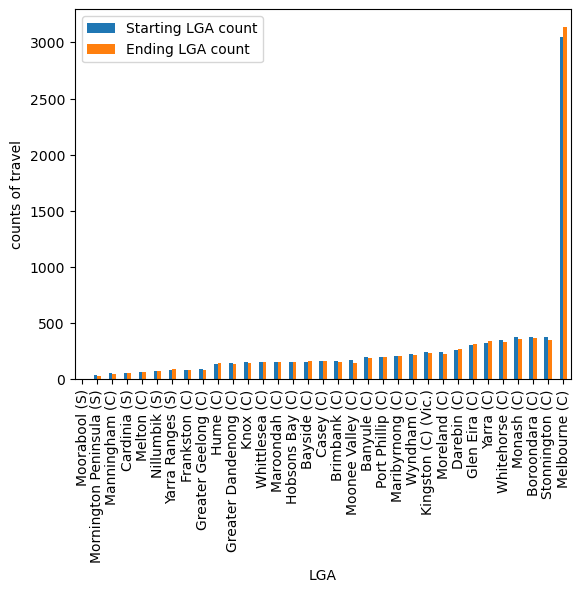

In [49]:
LGA_count.plot(kind='bar',x = 'LGA',ylabel='counts of travel')


## Grouping by purpose of travel

In [27]:
purpose_travel = Vista.groupby(by = 'Trip_Purpose').count()

In [35]:
purpose_travel_df = purpose_travel.reset_index(drop=False)[['Trip_Purpose','Trip_ID']]

In [41]:
purpose_travel_df = purpose_travel_df.sort_values(by='Trip_ID')

In [45]:
purpose_travel_df

,Trip_Purpose,Trip_ID
11,Unknown Purpose,1
4,Not Stated,2
7,Pick-up or Deliver Something,28
5,Other Purpose,29
0,Accompany Someone,55
9,Recreational,88
8,Pick-up or Drop-off Someone,125
6,Personal Business,203
1,Buy Something,368
3,Education,631


<Axes: xlabel='Trip Purpose', ylabel='Counts of Travel'>

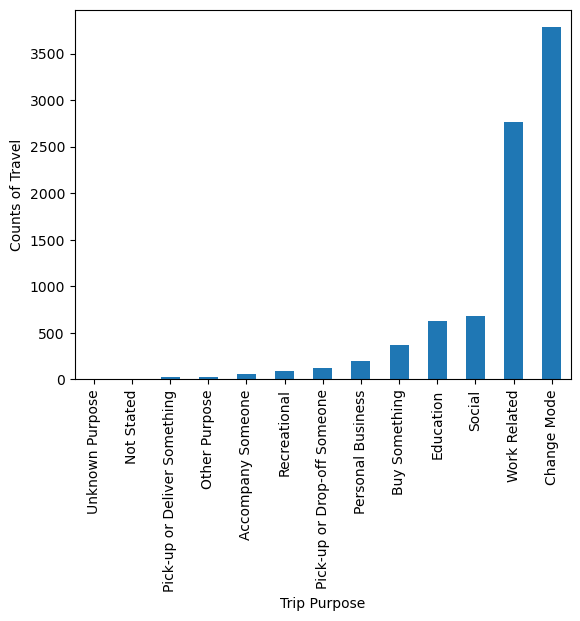

In [47]:
purpose_travel_df.plot(kind='bar',x='Trip_Purpose',xlabel = 'Trip Purpose',ylabel='Counts of Travel',legend=False)

##

In [ ]:
# Data only from 2018-2022 Check data from those years. 